# Week 11 - Introduction to Modeling, part 2

# 1. Lesson - No lesson this week

# 2. Weekly graph question

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

The book names one of Vonnegut's rules as "keep it simple" and another as "have the guts to cut."  Here is some data from the previous week's lesson.  If you had to cut one of the two plots below, which would it be?  Which seems more interesting or important?  Explain.  (Should "amount of training data used" or "number of estimators" be on the x-axis.)

In [2]:
np.random.seed(0)
num_points = 10000
feature_1a = np.random.random(size = num_points) * 3
feature_2a = np.random.random(size = num_points) * 3
feature_3a = np.random.random(size = num_points) * 3
train_target = (feature_1a - 2 * feature_2a) * feature_3a + np.random.normal(size = num_points)
feature_1b = np.random.random(size = num_points) * 3
feature_2b = np.random.random(size = num_points) * 3
feature_3b = np.random.random(size = num_points) * 3
test_target = (feature_1b - 2 * feature_2b) * feature_3b + np.random.normal(size = num_points)
train_df = pd.DataFrame({"f1": feature_1a, "f2": feature_2a, "f3": feature_3a})
test_df = pd.DataFrame({"f1": feature_1b, "f2": feature_2b, "f3": feature_3b})
rf = RandomForestRegressor()
rf.fit(train_df.values, train_target)

RandomForestRegressor()

In [3]:
rmse_lst = list()
rf = RandomForestRegressor()
for x in range(round(num_points / 20), num_points, round(num_points / 20)):
    rf.fit(train_df.values[0:x,:], train_target[0:x])
    rmse_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

import matplotlib.pyplot as plt

Text(0, 0.5, 'Loss function')

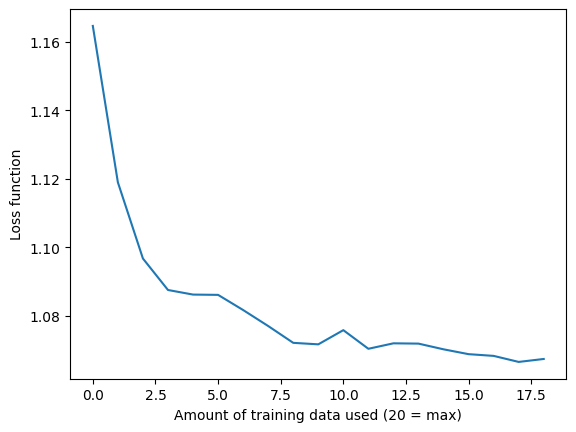

In [4]:
plt.plot(rmse_lst)
plt.xlabel("Amount of training data used (20 = max)")
plt.ylabel("Loss function")

In [5]:
num_trees_lst = list()
for n_estimators in range(1, 100, 3):
    rf = RandomForestRegressor(n_estimators = n_estimators)
    rf.fit(train_df.values, train_target)
    num_trees_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

Text(0, 0.5, 'Loss function')

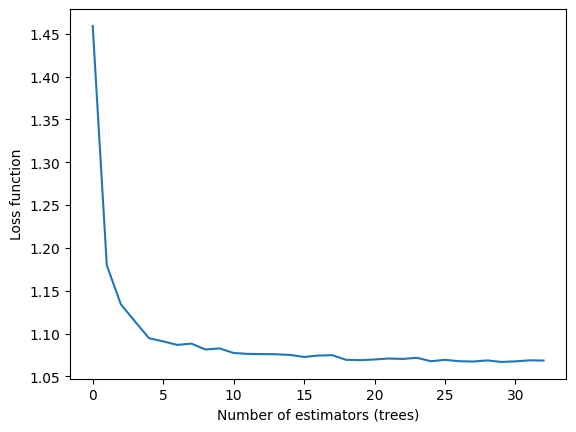

In [6]:
plt.plot(num_trees_lst)
plt.xlabel("Number of estimators (trees)")
plt.ylabel("Loss function")

In [ ]:
# I will keep the plot with training data size and cut the estimators plot.
# The training size plot helps to answer the questions of whether we need more data to train the model to improve the performance or not, which is a fundamental research question.
# The number of estimators is more fine-tuning and less essential than understanding the role of data volume.

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:

* Implement a random forest model.
* Perform cross-validation.
* Tune hyperparameters.
* Evaluate a performance metric.

If you like, you can try other types of models, too (beyond linear regression and random forest) although you will have many opportunities to do that next semester.

In [4]:
data = pd.read_csv('CVD_data2.csv')

In [5]:
data.head()

,DUPERSID,AGEY1X,ADSEX4,PRVEVY1,DIABDXY1_M18,DIABDXY2_M18,DIABAGY1,DIABAGY2,ANGIDXY1,ANGIDXY2,ARTHDXY1,ARTHDXY2,CHDDXY1,CHDDXY2,MIDXY1,MIDXY2,TOTTCHY1,TOTTCHY2,TOTTCHY1_rank,total_comorbidities
0,2680001101,65.0,NaN,1.0,2.0,2.0,NaN,NaN,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,0.0,0.0,350.0,1
1,2680001102,24.0,NaN,1.0,2.0,2.0,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1185.0,640.0,2315.5,0
2,2680006101,62.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,11453.0,17651.0,5102.0,1
3,2680010101,67.0,1.0,2.0,2.0,2.0,NaN,NaN,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,10284.0,1362.0,4960.0,1
4,2680015101,62.0,NaN,1.0,1.0,1.0,47.0,47.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,4172.0,1302.0,3827.0,2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6741 entries, 0 to 6740
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DUPERSID             6741 non-null   int64  
 1   AGEY1X               6616 non-null   float64
 2   ADSEX4               3499 non-null   float64
 3   PRVEVY1              6688 non-null   float64
 4   DIABDXY1_M18         6655 non-null   float64
 5   DIABDXY2_M18         6614 non-null   float64
 6   DIABAGY1             714 non-null    float64
 7   DIABAGY2             699 non-null    float64
 8   ANGIDXY1             5443 non-null   float64
 9   ANGIDXY2             5375 non-null   float64
 10  ARTHDXY1             5444 non-null   float64
 11  ARTHDXY2             5376 non-null   float64
 12  CHDDXY1              5441 non-null   float64
 13  CHDDXY2              5373 non-null   float64
 14  MIDXY1               5444 non-null   float64
 15  MIDXY2               5375 non-null   f

In [7]:
data_rf = data[['AGEY1X', 'PRVEVY1', 'DIABDXY1_M18', 'ANGIDXY1', 'ARTHDXY1', 'CHDDXY1', 'MIDXY1', 'total_comorbidities', 'TOTTCHY1', 'TOTTCHY1_rank']]
#only include complete cases
data_rf_exna = data_rf.dropna()

In [8]:
X = data_rf_exna[['AGEY1X', 'PRVEVY1', 'DIABDXY1_M18', 'ANGIDXY1', 'ARTHDXY1', 'CHDDXY1', 'MIDXY1', 'total_comorbidities']]
y = data_rf_exna['TOTTCHY1']
y2 = data_rf_exna['TOTTCHY1_rank']

In [9]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [10]:
gcv = GridSearchCV(estimator = RandomForestRegressor(), param_grid = {"n_estimators": [10, 33, 100, 200], "max_depth": [2, 4, 8, None]}, \
                   cv = 5, scoring = "neg_root_mean_squared_error")
gcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4, 8, None],
                         'n_estimators': [10, 33, 100, 200]},
             scoring='neg_root_mean_squared_error')

In [11]:
best_model = gcv.best_estimator_
gcv.cv_results_["mean_test_score"]


array([-53946.68462009, -53855.71317175, -53907.50630744, -53875.98938553,
       -54749.68988709, -54564.59372445, -54536.21569964, -54487.62726836,
       -59075.98502316, -57136.95043239, -57342.29535475, -57340.62184105,
       -60212.60445268, -60340.29948182, -60168.29598663, -59982.73391749])

In [12]:
y_pred = best_model.predict(X_test)
importances = best_model.feature_importances_
correlation = np.corrcoef(y_test, y_pred)[0, 1]
print(best_model)
print(gcv.best_params_)
print(gcv.best_score_)
print(correlation)
print(importances)

RandomForestRegressor(max_depth=2, n_estimators=33)
{'max_depth': 2, 'n_estimators': 33}
-53855.71317174627
0.18733209782563
[0.13705404 0.00521456 0.         0.         0.01987676 0.14338062
 0.03446805 0.66000598]


In [ ]:
#The model with best performane has max depth set at 2 and 10 estimators. 
#The negative of the RMSE is -53867. The correlation between actual y and predicted y in the test dataset is 0.18. The correlation is pretty weak.
#Total number of comorbidities is the top 1 most important feature, followed by CHD dagnosis and age. 

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, random_state=1)

In [13]:
gcv = GridSearchCV(estimator = RandomForestRegressor(), param_grid = {"n_estimators": [10, 33, 100, 200], "max_depth": [2, 4, 8, None]}, \
                   cv = 5, scoring = "neg_root_mean_squared_error")
gcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4, 8, None],
                         'n_estimators': [10, 33, 100, 200]},
             scoring='neg_root_mean_squared_error')

In [14]:
best_model = gcv.best_estimator_
gcv.cv_results_["mean_test_score"]

array([-54089.67127147, -53944.28650432, -53897.71861055, -53909.27425273,
       -54983.75643023, -54792.15434804, -54808.57869804, -54530.74597058,
       -57934.5192182 , -57276.90145241, -57594.05695529, -57259.39360103,
       -60598.68212822, -60211.20851054, -59825.74571505, -60087.19920228])

In [15]:
y_pred = best_model.predict(X_test)
importances = best_model.feature_importances_
correlation = np.corrcoef(y_test, y_pred)[0, 1]
print(best_model)
print(gcv.best_params_)
print(gcv.best_score_)
print(correlation)
print(importances)

RandomForestRegressor(max_depth=2)
{'max_depth': 2, 'n_estimators': 100}
-53897.718610550044
0.1792783397277902
[0.10401639 0.00224839 0.00353588 0.         0.00267401 0.16195417
 0.02595849 0.69961266]


In [ ]:
#The model with best performane has max depth set at 4 and 100 estimators. 
#The negative of the RMSE is -1755. The correlation between actual y and predicted y in the test dataset is 0.47. The correlation is moderate and improved significantly from predicting the actual value to predicting the healthcare cost rank.
#Feature importances are similar to the total costs model. 

# 4. Storytelling With Data plot

Reproduce any graph of your choice in chapter seven (p. 165-185) of the Storytelling With Data book as best you can. You do not have to get the exact data values right, just the overall look and feel.

In [10]:
import matplotlib.pyplot as plt

# Days since campaign launch
days = list(range(0, 31))
# Simulated fundraising progress for last year and current year
last_year = [0, 1000, 2500, 4000, 5200, 7000, 8500, 10500, 12500, 15000,
             16500, 18000, 19500, 21000, 22500, 24000, 26500, 29000, 31000, 33500, 
             36000, 38500, 40500, 43000, 45000, 47000, 48000, 49500, 50500, 51400, 51400]

this_year = [0, 1200, 3000, 4800, 6800, 8500, 10000, 13000, 16000, 20000,
             23000, 25000, 27000, 30000, 31000, 33967] + [None]*(30-15)

# Plotting
plt.figure(figsize=(10, 6))

# Last year line
plt.plot(days, last_year, color='lightblue', label='Last year')
plt.text(29, 51400, "$51,400", color='lightblue', va='bottom', ha='right')

# This year line (only up to current day)
plt.plot(days[:16], this_year[:16], color='dodgerblue', linewidth=3, label='This year')

# Highlight current progress
plt.scatter(15, this_year[15], color='dodgerblue', s=100)
plt.text(15, this_year[15] + 2000, "Progress to date\n$33,967", color='dodgerblue', ha='center', fontweight='bold')

# Goal line
plt.axhline(50000, color='gray', linestyle='-', linewidth=1)
plt.text(0, 50500, "GOAL", va='bottom', color='gray', fontweight='bold')

# Axis formatting
plt.xticks(range(0, 31, 5))
plt.yticks(range(0, 60001, 10000))
plt.xlabel("Days since campaign launch")
plt.ylabel("Money raised")
plt.title("Annual giving campaign progress")
plt.ylim(0, 60000)
plt.grid(False)
plt.tight_layout()
plt.show()
